<font color="black"><font size=6>**Cosmology Tools**</font></font> 
 
 
###### <font color="#666666">Author: Katie Chamberlain, 5 October 2018</font> 

In [1]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G
import scipy.integrate as integrate
from scipy.integrate import quad

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [6]:
class CosmologicalTools:
    '''
    Compute various cosmological quantities for
    a given cosmology. 
    Function is called as CosmologicalTools(OmegaM, OmegaR, OmegaL, h)
    '''
        
    def __init__(self, OmegaM, OmegaR, OmegaL, h):
        '''
        initialize class - for any cosmology:
        Inputs:    Omega M matter density parameter
                   Omega R radiation density parameter
                   Omega L  dark energy density parameter
                   h  normalization for the hubble parameter
        '''
        
        # initialize the cosmology
        self.OmegaM = OmegaM # Matter Density Parameter
        self.OmegaL = OmegaL # Dark Energy Density Parameter
        self.OmegaR = OmegaR # Radiation density Parameter
        self.OmegaK = 1.0 - (OmegaM + OmegaL + OmegaR)  # Curvature Parameter
        self.h = h # Normalization of Hubble Parameter   
        self.Ho = h*100 # Hubble Constant at z=0  100 h km/s/Mpc

        # physical constants
        self.c = 299792.458 # km/s
            
        # if open universe, compute the radius of curvature for distance measure
        if self.OmegaK > 0:
            k = -1
            self.Rc = np.sqrt((-k*self.c**2)/((self.Ho**2)*self.OmegaK)) 
    
    def HubbleParameterZ(self, z):
        '''
        Hubble parameter as a function of redshift
        Redshift can be number or array - Returns in units of km/s/Mpc
        '''   
        Omz = self.OmegaM*(1+z)**3
        Orz = self.OmegaR*(1+z)**4
        OKz = self.OmegaK*(1+z)**2
        OLz = self.OmegaL
        Hz=np.sqrt(self.Ho**2*(Omz+Orz+OKz+OLz))
        return Hz

    def OmegaM_Z(self,z):
        '''
        Matter density parameter as a function of redshift
        Redshift can be number or array
        '''
        omz = self.OmegaM*(1+z)**3*(self.Ho/self.HubbleParameterZ(z))**2
        return omz
    
    def OmegaR_Z(self,z):
        '''
        Radiation density parameter as a function of redshift
        Redshift can be number or array
        '''
        orz = self.OmegaR*(1+z)**4*(self.Ho/self.HubbleParameterZ(z))**2
        return orz
    
    def OmegaL_Z(self,z):
        '''
        Dark energy density parameter as a function of redshift
        Redshift can be number or array
        '''
        olz = self.OmegaL*(self.Ho/self.HubbleParameterZ(z))**2
        return olz

    def comovingDistance(self,z):
        '''
        calculates comoving distance as a function of redshift
        Redshift must be number (not array!) - gives distance between 0 and z
        '''
        def integrand(x):
            return self.c/self.HubbleParameterZ(x)
        return integrate.quad(integrand, 0, z)[0]
    
    def distanceMeasure(self,z):
        '''
        calculates distance measure if the universe is open
        Redshift must be number
        '''
        if self.OmegaK > 0:
            return self.Rc*np.sinh(self.comovingDistance(z)/self.Rc)
        else: 
            return self.comovingDistance(z)
    
    def angularDiameter(self,z):
        '''
        angular diameter distance as a function of redshift
        Redshift must be number - integrates between 0 and z
        '''
        return self.distanceMeasure(z)/(1+z) # Mpc/rad
    
    def luminosityDistance(self,z):
        '''
        luminosity distance as a function of redshift
        Redshift must be number - integrates between 0 and z
        '''
        return self.distanceMeasure(z)*(1+z)
    
    def distanceModulus(self,z):
        '''
        distance modulus at z
        Redshift must be number
        '''
        return (5*np.log10(self.luminosityDistance(z)*1e5))
        
    def lookbackTime(self,z):
        '''
        lookback time at z
        Redshift must be number - from z=0 to z and returns in gigayears
        '''
        def integrand(x):
                return (self.HubbleParameterZ(x)*(1+x))**-1
        return integrate.quad(integrand, 0, z)[0]*9.77799e2

    def ageUniverse(self,z):
        '''
        age of the universe at z
        Redshift must be number - from z to infinity and returns in gigayears
        '''
        def integrand(x):
                return (self.HubbleParameterZ(x)*(1+x))**-1
        intTotal = integrate.quad(integrand, 0, np.inf)[0]*9.77799e2
        return intTotal-self.lookbackTime(z)
    
    def comovingVolume(self,z):
        '''
        comoving volume per deg squared per z at a given z
        Redshift must be number - between z=0 and z in Mpc^3/deg^2/z
        '''
        st = 41253/(4*np.pi) # 1 steradian is this many square degrees
        return (self.distanceMeasure(z)**2)*self.c/self.HubbleParameterZ(z)/st
    
    def H0Limits(self,t):
        '''
        enter time in Gyr
        returns the upper bound on the hubble constant 
        for a universe with age t or older in km/s/Mpc
        '''
        def integrand(x):
                return ((self.HubbleParameterZ(x)/self.Ho)*(1+x))**-1
        unitConv = ((1)/(3.154e16))*((1)/(3.241e-20)) # 1/gyr to km/s/Mpc
        return (integrate.quad(integrand, 0, np.inf)[0]/t)*unitConv

    

In [10]:
EdS = CosmologicalTools(1,0,0,0.7)
print(EdS.HubbleParameterZ(1))
print(EdS.OmegaM_Z(1))
print(EdS.OmegaR_Z(1))
print(EdS.OmegaL_Z(1))
print(EdS.comovingDistance(1))
print(EdS.distanceMeasure(1))
print(EdS.angularDiameter(1))
print(EdS.luminosityDistance(1))
print(EdS.distanceModulus(1))
print(EdS.lookbackTime(1))
print(EdS.ageUniverse(1))
print(EdS.comovingVolume(1))
print(EdS.H0Limits(13))


197.9898987322333
0.9999999999999998
0.0
0.0
2508.7765142747644
2508.7765142747644
1254.3882571373822
5017.553028549529
43.50245985535889
6.019950935536071
3.292420493035358
2903059.5695713675
50.167755204110705


# Question 1

Make plots for comoving distance, angular diameter distance, luminosity distance (and distance modulus), comoving volume per square degree per redshift, and lookback time, for the following cosmologies:

\begin{align} (\Omega_m,\Omega_\Lambda)&=(1,0) \quad & \mbox{Einstein de-Sitter}\\
&=(0.3,0) & \mbox{Open}\\
&=(0.3,0.7) &  \mbox{Benchmark}\\
\end{align}

In [3]:
h = 0.7 # corresponds to a hubble constant of H0 = 70 kpc/s/Mpc

# Creating instance of the class for each cosmology:
EdS = CosmologicalTools(1,0,h) # inputs are Omega matter, Omega lambda, and h
Benchmark = CosmologicalTools(0.3,0.7,h)
Open = CosmologicalTools(0.3,0,h)

In [10]:
# create a table of redshifts of interest
redshifts=np.arange(0.1,5,0.1)

In [11]:
# Defining the comoving distances in each cosmology
BenchmarkComoving = np.array([Benchmark.comovingDistance(red) for red in redshifts])
EdSComoving = np.array([EdS.comovingDistance(red) for red in redshifts])
OpenComoving = np.array([Open.comovingDistance(red) for red in redshifts])

# Defining the distance measure in each cosmology
BenchmarkDistanceMeasure = np.array([Benchmark.distanceMeasure(red) for red in redshifts])
EdSDistanceMeasure = np.array([EdS.distanceMeasure(red) for red in redshifts])
OpenDistanceMeasure = np.array([Open.distanceMeasure(red) for red in redshifts])

# Defining the angular diameter distance in each cosmology
EdSAngular = np.array([EdS.angularDiameter(red) for red in redshifts])
BenchmarkAngular = np.array([Benchmark.angularDiameter(red) for red in redshifts])
OpenAngular = np.array([Open.angularDiameter(red) for red in redshifts])

# Defining the luminosity distance in each cosmology
EdSLuminosity = np.array([EdS.luminosityDistance(red) for red in redshifts])
BenchmarkLuminosity = np.array([Benchmark.luminosityDistance(red) for red in redshifts])
OpenLuminosity = np.array([Open.luminosityDistance(red) for red in redshifts])

# Defining the distance modulus in each cosmology
EdSModulus = np.array([EdS.distanceModulus(red) for red in redshifts])
BenchmarkModulus = np.array([Benchmark.distanceModulus(red) for red in redshifts])
OpenModulus = np.array([Open.distanceModulus(red) for red in redshifts])

# Defining the lookback time in each cosmology
BenchmarkLookback = np.array([Benchmark.lookbackTime(red) for red in redshifts])
EdSLookback = np.array([EdS.lookbackTime(red) for red in redshifts])
OpenLookback = np.array([Open.lookbackTime(red) for red in redshifts])

# Defining the age of the universe in each cosmology
BenchmarkAge = np.array([Benchmark.ageUniverse(red) for red in redshifts])
EdSAge = [EdS.ageUniverse(red) for red in redshifts]
OpenAge = [Open.ageUniverse(red) for red in redshifts]

# Defining the comoving volume in each cosmology
BenchmarkComovingVol = np.array([Benchmark.comovingVolume(red) for red in redshifts])
EdSComovingVol = np.array([EdS.comovingVolume(red) for red in redshifts])
OpenComovingVol = np.array([Open.comovingVolume(red) for red in redshifts])

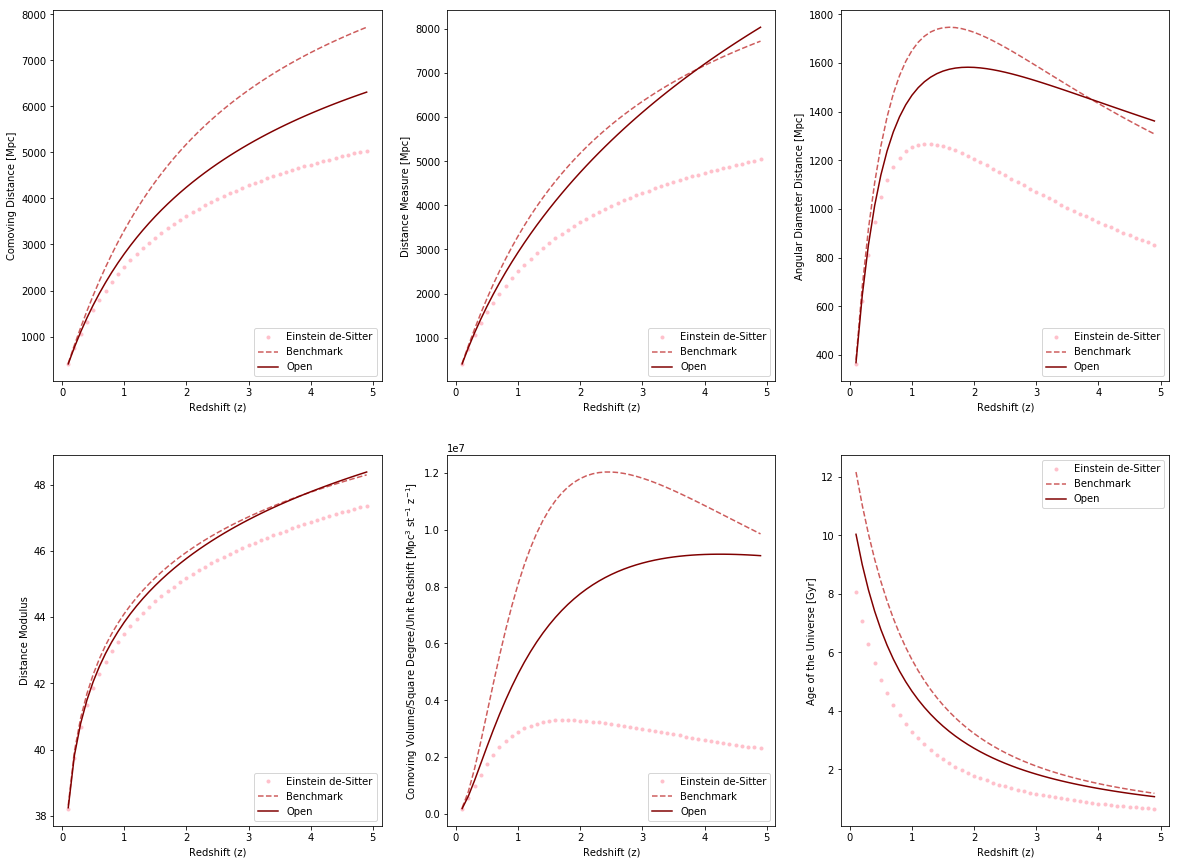

Some main trends are that the profiles of the comoving distance, the distance modulus,
and the age of the universe are all roughly similar across the cosmologies, while in particular,
the angular diameter distance and the comoving volume per steradian per unit redshift vary wildly
for the different cosmologies.


In [18]:
fig,ax = plt.subplots(2,3,figsize=(20,15))
# plot 0-0
ax[0][0].plot(redshifts,EdSComoving,'.',color='pink',label='Einstein de-Sitter')
ax[0][0].plot(redshifts,BenchmarkComoving,'--',color='indianred',label = 'Benchmark')
ax[0][0].plot(redshifts,OpenComoving,color='maroon',label='Open')
ax[0][0].set(xlabel='Redshift (z)',ylabel='Comoving Distance [Mpc]')
ax[0][0].legend(loc='lower right')

# plot 0-1
ax[0][1].plot(redshifts,EdSDistanceMeasure,'.',color='pink',label='Einstein de-Sitter')
ax[0][1].plot(redshifts,BenchmarkDistanceMeasure, '--',color='indianred',label = 'Benchmark')
ax[0][1].plot(redshifts,OpenDistanceMeasure,color='maroon',label='Open')
ax[0][1].set(xlabel='Redshift (z)',ylabel='Distance Measure [Mpc]')
ax[0][1].legend(loc='lower right')

# plot 0-2
ax[0][2].plot(redshifts,EdSAngular,'.',color='pink',label='Einstein de-Sitter')
ax[0][2].plot(redshifts,BenchmarkAngular, '--',color='indianred',label = 'Benchmark')
ax[0][2].plot(redshifts,OpenAngular,color='maroon',label='Open')
ax[0][2].set(xlabel='Redshift (z)',ylabel='Angular Diameter Distance [Mpc]')
ax[0][2].legend(loc='lower right')

# plot 1-0
ax[1][0].plot(redshifts,EdSModulus,'.',color='pink',label='Einstein de-Sitter')
ax[1][0].plot(redshifts,BenchmarkModulus, '--',color='indianred',label = 'Benchmark')
ax[1][0].plot(redshifts,OpenModulus,color='maroon',label='Open')
ax[1][0].set(xlabel='Redshift (z)',ylabel='Distance Modulus')
ax[1][0].legend(loc='lower right')

# plot 1-1
ax[1][1].plot(redshifts,EdSComovingVol,'.',color='pink',label='Einstein de-Sitter')
ax[1][1].plot(redshifts,BenchmarkComovingVol, '--',color='indianred',label = 'Benchmark')
ax[1][1].plot(redshifts,OpenComovingVol,color='maroon',label='Open')
ax[1][1].set(xlabel='Redshift (z)',ylabel='Comoving Volume/Square Degree/Unit Redshift [Mpc$^3$ st$^{-1}$ z$^{-1}$]')
ax[1][1].legend(loc='lower right')

# plot 1-2
ax[1][2].plot(redshifts,EdSAge,'.',color='pink',label='Einstein de-Sitter')
ax[1][2].plot(redshifts,BenchmarkAge, '--',color='indianred',label = 'Benchmark')
ax[1][2].plot(redshifts,OpenAge,color='maroon',label='Open')
ax[1][2].set(xlabel='Redshift (z)',ylabel='Age of the Universe [Gyr]')
ax[1][2].legend(loc='upper right')
plt.show()

print('Some main trends are that the profiles of the comoving distance, the distance modulus,\nand the age of the universe are all roughly similar across the cosmologies, while in particular,\nthe angular diameter distance and the comoving volume per steradian per unit redshift vary wildly\nfor the different cosmologies.')


# Question 2

Given that we know the apparent magnitude of a galaxy in the R band at $z=0$, what is the apparent magnitude of the galaxy in the K band at $z=1.75$. So first we need to find the luminosity of the source in the R band, so that we can then calculate the luminosity distance of the K band source, and back calculate the magnitude of the galaxy in the K band.

In [21]:
cosmologies = [EdS, Benchmark, Open]

# finding the luminosity of the galaxy at z=0 in the R band
magR = 10
point0R = 3080
flux = (10**(magR/-2.5))*point0R # same in all cosmologies
luminosityR = (flux*4*np.pi*7**2) # same in all cosmologies

# finding the apparent magnitude of the galaxy at z=1.75 in the K band
luminosityK = luminosityR
luminDistK = np.array([i.luminosityDistance(1.75) for i in cosmologies])
fluxK = luminosityK/(4*np.pi*luminDistK**2)
point0K = 640 
magK = -2.5*np.log10(fluxK/point0K)

In [22]:
print('The corresponding apparent magnitude in the K band in an Einstein de-Sitter universe is: %.2f'% magK[0])
print('The corresponding apparent magnitude in the K band in a benchmark universe is: %.2f'% magK[1])
print('The corresponding apparent magnitude in the K band in an open universe is: %.2f'% magK[2])

The corresponding apparent magnitude in the K band in an Einstein de-Sitter universe is: 23.92
The corresponding apparent magnitude in the K band in a benchmark universe is: 24.67
The corresponding apparent magnitude in the K band in an open universe is: 24.46


# Question 3

If the number density of such galaxies is 0.01 Mpc$^{−3}$ in the local universe and if the galaxies are not changing, how many of these galaxies would be predicted in a 1 square degree survey between $z = 1.7$ and $z = 1.8$? Compute this for all three cosmologies in Problem 1.
You need not do the integral between $z = 1.7$ and $z = 1.8$ more accurately than the width in redshift times the value of the integrand at the central value.


The exact form for the total comoving volume would be $$\bigg(\int^{z_2}_{z_1}\frac{dV_{comov}}{d\Omega\,dz} dz\bigg)*\mbox{patch size}$$
for $z_2=1.8$ and $z_1=1.7$ but we can estimate this integral as 
$$\bigg(\frac{dV_{comov}}{d\Omega}\bigg)\bigg|_{z=1.75}* \Delta z*\mbox{patch size}$$
where $\Delta z$ is 0.1, and the patch size is in steradians.

In [24]:
zz = 1.75
deltaz = 0.1
scaleFactor = 1/(1+zz)
density = 0.01 # Mpc^-3 
eds = EdS.comovingVolume(zz)
op = Open.comovingVolume(zz)
bench = Benchmark.comovingVolume(zz)

print('Within a 1 square degree survey, we would expect to see:')
print('the total number of galaxies for an Einstein de Sitter universe to be   %.2f galaxies'% (eds*density*scaleFactor**3*deltaz))
print('the total number of galaxies for a Benchmark-like universe to be        %.2f galaxies'% (bench*density*scaleFactor**3*deltaz))
print('the total number of galaxies for an open universe to be                 %.2f galaxies'% (op*density*scaleFactor**3*deltaz))

Within a 1 square degree survey, we would expect to see:
the total number of galaxies for an Einstein de Sitter universe to be   159.04 galaxies
the total number of galaxies for a Benchmark-like universe to be        547.95 galaxies
the total number of galaxies for an open universe to be                 349.32 galaxies


# Question 4

Consider two galaxies at $z ≈ 1.75$ that are separated by $40$′′ on the sky and $∆z = 0.003$ in redshift. Assuming that the redshift difference is strictly cosmological (probably not a good assumption as we’ll learn later), what is the proper (not comoving) separation between the galaxies. Again, do this for all three cosmologies in Problem 1.

In [25]:
galRedshifts = np.array([1.75, 1.753])
galScales = 1/(1+galRedshifts)

# the comoving distance for each galaxy in each cosmology
comovingsEdS = [EdS.comovingDistance(i) for i in galRedshifts]
comovingsBench = [Benchmark.comovingDistance(i) for i in galRedshifts]
comovingsOpen = [Open.comovingDistance(i) for i in galRedshifts]

# finding the line of sight distance difference (in physical units, not comoving)
lineOfSightDistEdS = -comovingsEdS[1]*galScales[1]+comovingsEdS[0]*galScales[0]
lineOfSightDistBench = -comovingsBench[1]*galScales[1]+comovingsBench[0]*galScales[0]
lineOfSightDistOpen = -comovingsOpen[1]*galScales[1]+comovingsOpen[0]*galScales[0]

# the angular diameter distance at the given redshift multiplied by the separation of the galaxies across the sky
# 40'' = 0.0001939 radians
angleDiamEds = EdS.angularDiameter(1.75)*0.000193925
angleDiamBench = Benchmark.angularDiameter(1.75)*0.000193925
angleDiamOpen = Open.angularDiameter(1.75)*0.000193925

# finding the proper distance via the pythagorean theorem
properDistEdS = np.sqrt(lineOfSightDistEdS**2+angleDiamEds**2)
properDistBench = np.sqrt(lineOfSightDistBench**2+angleDiamBench**2)
properDistOpen = np.sqrt(lineOfSightDistOpen**2+angleDiamOpen**2)

print('The proper distance between the galaxies in an Einstein de Sitter universe is:   %.4f Mpc' % properDistEdS)
print('The proper distance between the galaxies in a Benchmark universe is:             %.4f Mpc' %properDistBench)
print('The proper distance between the galaxies in an open universe is:                 %.4f Mpc' %properDistOpen)

The proper distance between the galaxies in an Einstein de Sitter universe is:   0.4038 Mpc
The proper distance between the galaxies in a Benchmark universe is:             0.3625 Mpc
The proper distance between the galaxies in an open universe is:                 0.3609 Mpc


# Question 5

The age of a universe with $Ω_m = 1$ and $Ω_\Lambda=0$ is $\frac{2}{3H_0}$. We believe that the universe is at least 12 Gyr old. What does this imply about $H_0$ in an Einstein de Sitter universe?

If $t = \frac{2}{3 H_0}$ and we know that $t\geq 12 Gyr$, then
\begin{align}
12 Gyr &\leq \frac{2}{3 H_0}\\
\implies H_0 &\leq \frac{2}{3*12 Gyr}\\
H_0 &\leq \frac{1}{18 Gyr}
\end{align}

In [26]:
EdSH0 = (1/(18))*((1)/(3.154e16))*((1)/(3.241e-20)) # (1/gyr)*(gyr/second)*(km/Mpc)

The Hubble constant must then be $H_0\leq 54.35$ km/s/Mpc.

#### Part a
Find the limits on $H_0$ for an open model with $\Omega_m = 0.2$ and $\Omega_\Lambda = 0$.

In [27]:
openModel = CosmologicalTools(0.2,0,h)
openModel.H0Limits(12)

69.00819943294341

The limit on $H_0$ for an open model with $\Omega_m = 0.2$ and $\Omega_\Lambda = 0$ is $H_0\leq 69$ km/s/Mpc.

#### Part b
Find the limit on $H_0$ for a flat model with $\Omega_m = 0.2$ and $\Omega_\Lambda = 0.8$.

In [28]:
flatModel = CosmologicalTools(0.2,0.8,h)
flatModel.H0Limits(12)

87.72014220101721

The limit on $H_0$ for a flat model with $\Omega_m = 0.2$ and $\Omega_\Lambda = 0.8$ is $H_0\leq 87.7$ km/s/Mpc.